<a href="https://colab.research.google.com/github/m0bi/clustering_practice/blob/main/Ezra_Cook_DS_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, KBinsDiscretizer, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import sys
import itertools
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Data Exploration

In [ ]:
df = pd.read_csv("./drive/MyDrive/Data/ARP_MitM_dataset.csv", header=None)

In [ ]:
df.head()

0       1             2         3       4             5         6    \
0  1.000000  1294.0  0.000000e+00  1.000000  1294.0  0.000000e+00  1.000000   
1  1.000000  1514.0  0.000000e+00  1.000000  1514.0  0.000000e+00  1.000000   
2  1.999505  1294.0  6.984919e-10  1.999703  1294.0  2.328306e-10  1.999901   
3  2.998985  1294.0  9.313226e-10  2.999391  1294.0  4.656613e-10  2.999797   
4  3.998061  1294.0  9.313226e-10  3.998836  1294.0  2.328306e-10  3.999612   

      7             8         9       10            11        12      13   \
0  1294.0  0.000000e+00  1.000000  1294.0  0.000000e+00  1.000000  1294.0   
1  1514.0  0.000000e+00  1.000000  1514.0  0.000000e+00  1.000000  1514.0   
2  1294.0  6.984919e-10  1.999990  1294.0  0.000000e+00  1.999999  1294.0   
3  1294.0  6.984919e-10  2.999980  1294.0  6.984919e-10  2.999998  1294.0   
4  1294.0  6.984919e-10  3.999961  1294.0  2.328306e-10  3.999996  1294.0   

            14        15      16            17        18      19   \
0  0.000000e+00  1.000000  1294.0  0.000000e+00  1.000000  1294.0   
1  0.000000e+00  1.000000  1514.0  0.000000e+00  1.000000  1514.0   
2  0.000000e+00  1.999505  1294.0  6.984919e-10  1.999703  1294.0   
3  2.328306e-10  2.998985  1294.0  9.313226e-10  2.999391  1294.0   
4  0.000000e+00  3.998061  1294.0  9.313226e-10  3.998836  1294.0   

            20        21      22            23        24      25   \
0  0.000000e+00  1.000000  1294.0  0.000000e+00  1.000000  1294.0   
1  0.000000e+00  1.000000  1514.0  0.000000e+00  1.000000  1514.0   
2  2.328306e-10  1.999901  1294.0  6.984919e-10  1.999990  1294.0   
3  4.656613e-10  2.999797  1294.0  6.984919e-10  2.999980  1294.0   
4  2.328306e-10  3.999612  1294.0  6.984919e-10  3.999961  1294.0   

            26        27      28            29        30      31        32   \
0  0.000000e+00  1.000000  1294.0  0.000000e+00  1.000000  1294.0  0.000000   
1  0.000000e+00  1.000000  1514.0  0.000000e+00  1.000000  1514.0  0.000000   
2  0.000000e+00  1.999999  1294.0  0.000000e+00  1.999505  1294.0  0.000026   
3  6.984919e-10  2.999998  1294.0  2.328306e-10  2.998985  1294.0  0.000031   
4  2.328306e-10  3.999996  1294.0  0.000000e+00  3.998061  1294.0  0.000031   

      33            34   35   36        37      38        39      40   \
0  1294.0  0.000000e+00  0.0  0.0  1.000000  1294.0  0.000000  1294.0   
1  1514.0  0.000000e+00  0.0  0.0  1.000000  1514.0  0.000000  1514.0   
2  1294.0  6.984919e-10  0.0  0.0  1.999703  1294.0  0.000015  1294.0   
3  1294.0  9.313226e-10  0.0  0.0  2.999391  1294.0  0.000022  1294.0   
4  1294.0  9.313226e-10  0.0  0.0  3.998836  1294.0  0.000015  1294.0   

            41   42   43        44      45        46      47            48   \
0  0.000000e+00  0.0  0.0  1.000000  1294.0  0.000000  1294.0  0.000000e+00   
1  0.000000e+00  0.0  0.0  1.000000  1514.0  0.000000  1514.0  0.000000e+00   
2  2.328306e-10  0.0  0.0  1.999901  1294.0  0.000026  1294.0  6.984919e-10   
3  4.656613e-10  0.0  0.0  2.999797  1294.0  0.000026  1294.0  6.984919e-10   
4  2.328306e-10  0.0  0.0  3.999612  1294.0  0.000026  1294.0  6.984919e-10   

   49   50        51      52        53      54            55   56   57   \
0  0.0  0.0  1.000000  1294.0  0.000000  1294.0  0.000000e+00  0.0  0.0   
1  0.0  0.0  1.000000  1514.0  0.000000  1514.0  0.000000e+00  0.0  0.0   
2  0.0  0.0  1.999990  1294.0  0.000000  1294.0  0.000000e+00  0.0  0.0   
3  0.0  0.0  2.999980  1294.0  0.000026  1294.0  6.984919e-10  0.0  0.0   
4  0.0  0.0  3.999961  1294.0  0.000015  1294.0  2.328306e-10  0.0  0.0   

        58      59        60      61            62   63   64        65   \
0  1.000000  1294.0  0.000000  1294.0  0.000000e+00  0.0  0.0  1.000000   
1  1.000000  1514.0  0.000000  1514.0  0.000000e+00  0.0  0.0  1.000000   
2  1.999999  1294.0  0.000000  1294.0  0.000000e+00  0.0  0.0  1.999505   
3  2.999998  1294.0  0.000015  1294.0  2.328306e-10  0.0  0.0  2.998985   
4  3.999996  1294.0  0.00

In [ ]:
df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
30     float64
31     float64
32     float64
33     float64
34     float64
35     float64
36     float64
37     float64
38     float64
39     float64
40     float64
41     float64
42     float64
43     float64
44     float64
45     float64
46     float64
47     float64
48     float64
49     float64
50     float64
51     float64
52     float64
53     float64
54     float64
55     float64
56     float64
57     float64
58     float64
59     float64
60     float64
61     float64
62     float64
63     float64
64     float64
65     float64
66     flo

In [ ]:
df.isnull().mean()

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
30     0.0
31     0.0
32     0.0
33     0.0
34     0.0
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46     0.0
47     0.0
48     0.0
49     0.0
50     0.0
51     0.0
52     0.0
53     0.0
54     0.0
55     0.0
56     0.0
57     0.0
58     0.0
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
67     0.0
68     0.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.0
78     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     0.0
87     0.0
88     0.0
89     0.0
90     0.0

In [ ]:
plt.figure(figsize = (150,150))
sb.heatmap(df.corr(), cmap="coolwarm", annot=True)

There are a lot of highly/perfectly correlated features.

In [ ]:
df_np = df.copy().to_numpy()
df_np.shape

(2504267, 115)

In [ ]:
value_range = df_np.max(axis=0) - df_np.min(axis=0)
print(value_range.mean())
value_range

2.4530524987259416e+16


array([5.35587672e+02, 1.45400000e+03, 4.94229065e+05, 8.06313542e+02,
       1.45400000e+03, 4.94825866e+05, 2.12389303e+03, 1.45400000e+03,
       4.95307530e+05, 1.98383636e+04, 1.45400000e+03, 4.95486391e+05,
       1.95287178e+05, 1.45400000e+03, 4.95502977e+05, 5.35587672e+02,
       1.45400000e+03, 2.65014291e+05, 8.06313542e+02, 1.45400000e+03,
       2.35349125e+05, 2.12389303e+03, 1.45400000e+03, 2.10541224e+05,
       1.98454671e+04, 1.45400000e+03, 2.04079600e+05, 1.96689232e+05,
       1.45400000e+03, 2.03419922e+05, 5.35587672e+02, 1.45400000e+03,
       5.13853454e+02, 1.45400000e+03, 2.64079811e+05, 2.13442492e+04,
       2.28306097e+00, 8.06313523e+02, 1.45400000e+03, 4.84675491e+02,
       1.45400000e+03, 2.34912463e+05, 1.94658643e+04, 1.83176319e+00,
       2.12389255e+03, 1.45400000e+03, 4.58847713e+02, 1.45400000e+03,
       2.11251708e+05, 1.32265388e+04, 1.07557289e+00, 1.98443175e+04,
       1.45400000e+03, 4.51751702e+02, 1.45400000e+03, 2.04079600e+05,
      

The data is encoded as a float and there are no missing values. The data does have to be scaled, and the distribution of each column needs to be checked.

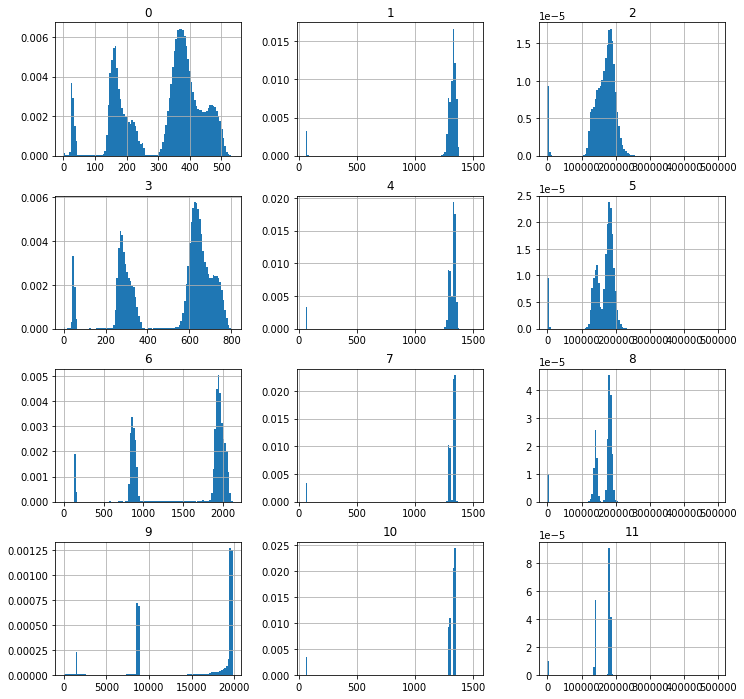

In [ ]:
df.iloc[:, 0:12].hist(bins=100, figsize=(12,12), density=True);

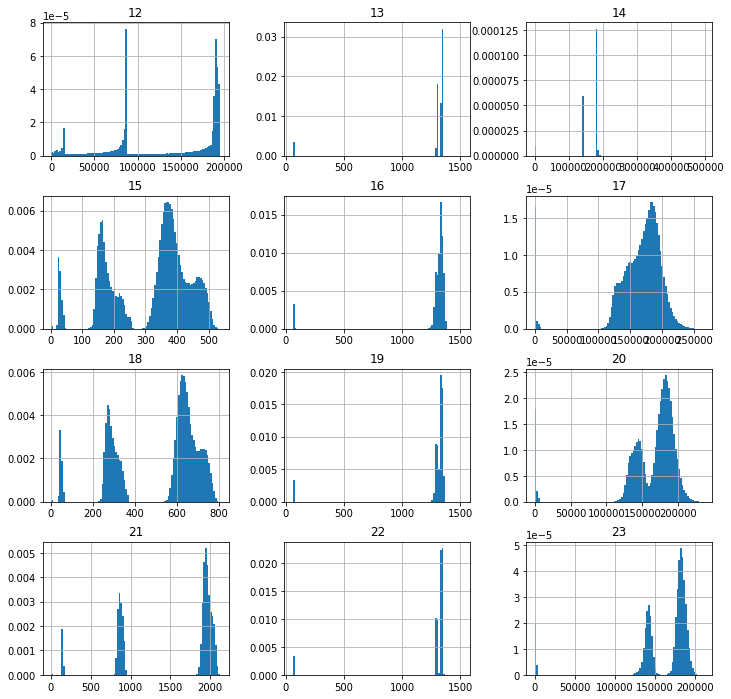

In [ ]:
df.iloc[:, 12:24].hist(bins=100, figsize=(12,12), density=True);

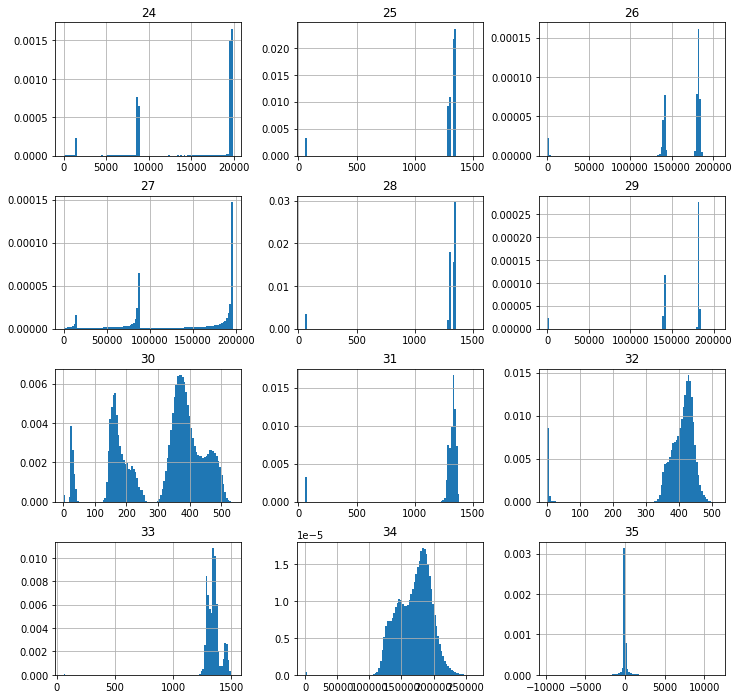

In [ ]:
df.iloc[:, 24:36].hist(bins=100, figsize=(12,12), density=True);

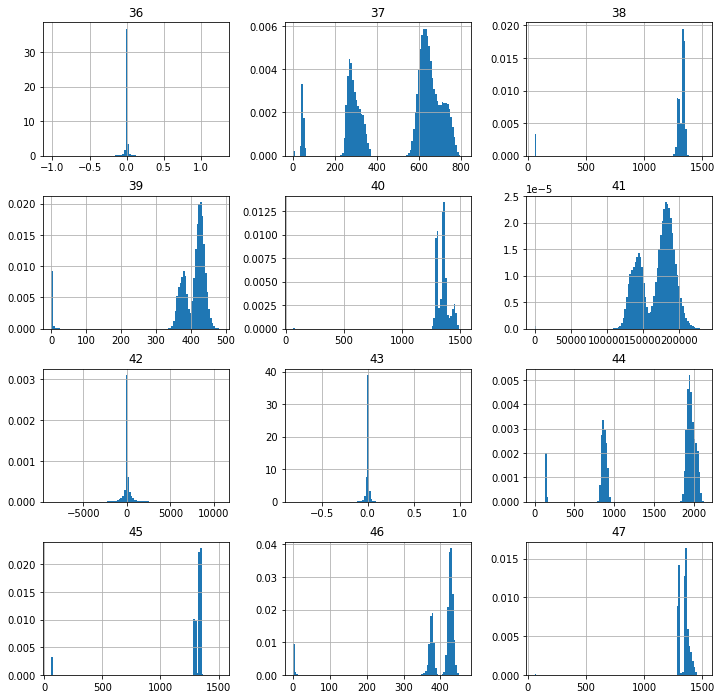

In [ ]:
df.iloc[:, 36:48].hist(bins=100, figsize=(12,12), density=True);

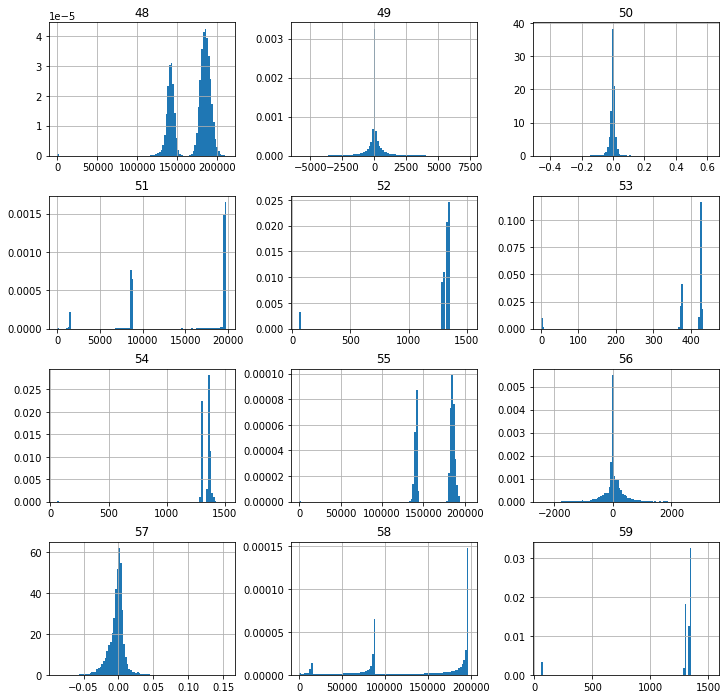

In [ ]:
df.iloc[:, 48:60].hist(bins=100, figsize=(12,12), density=True);

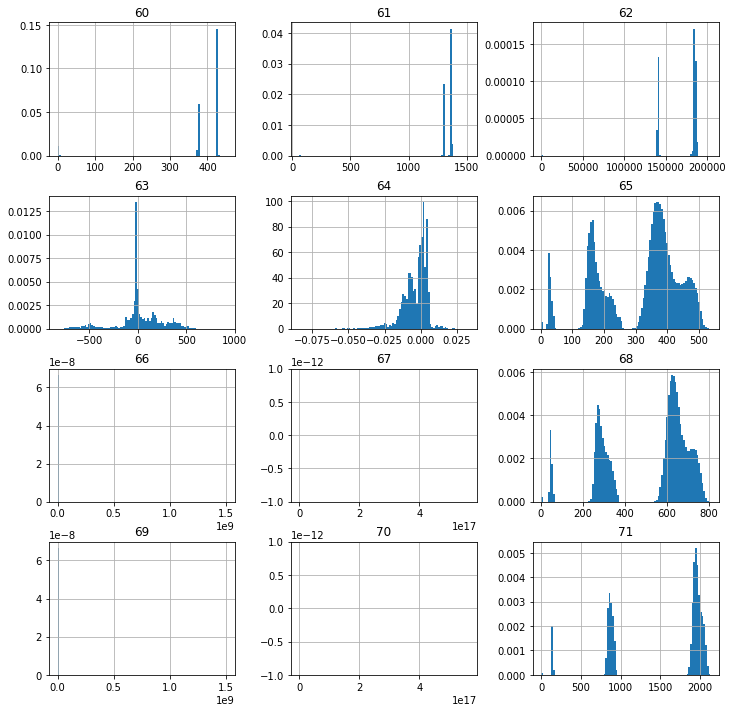

In [ ]:
df.iloc[:, 60:72].hist(bins=100, figsize=(12,12), density=True);

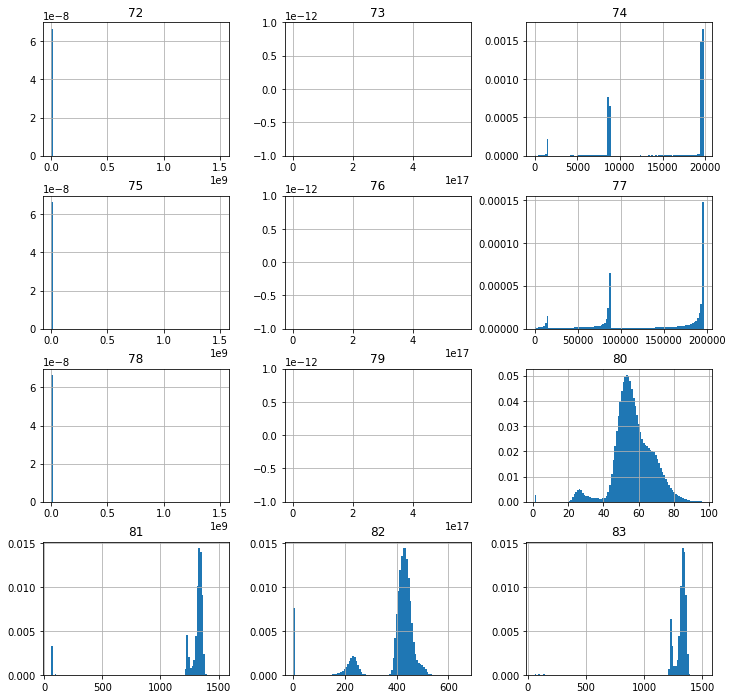

In [ ]:
df.iloc[:, 72:84].hist(bins=100, figsize=(12,12), density=True);

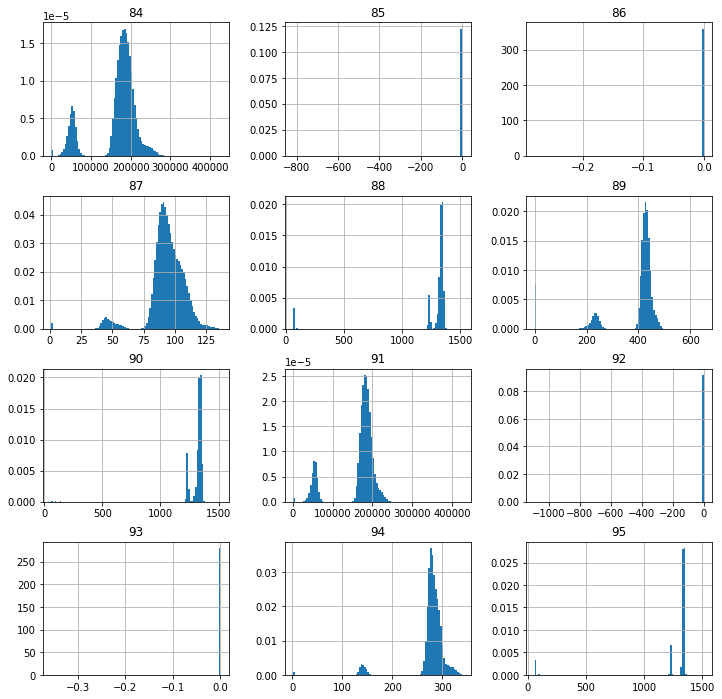

In [ ]:
df.iloc[:, 84:96].hist(bins=100, figsize=(12,12), density=True);

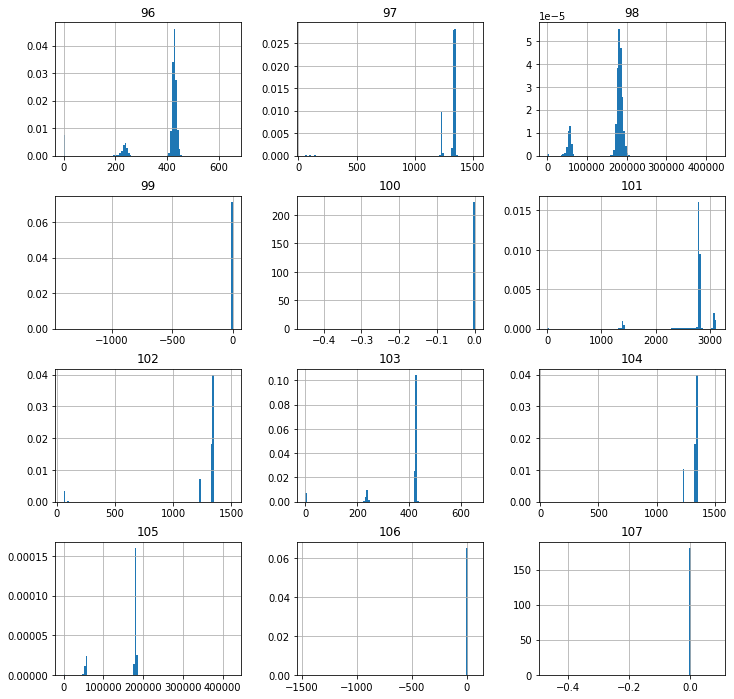

In [ ]:
df.iloc[:, 96:108].hist(bins=100, figsize=(12,12), density=True);

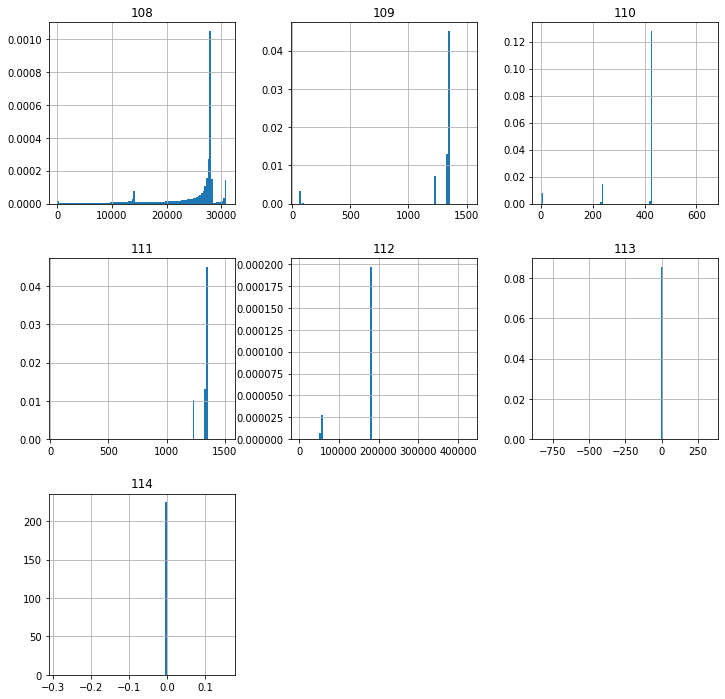

In [ ]:
df.iloc[:, 108:115].hist(bins=100, figsize=(12,12), density=True);

There are a lot of multimodal and left skewed distributions in this data set. I start by removing as much of the skew as possible in order to increase the variance of the data, which will help with clustering. I then min-max scale the data. Min-max scaling is useful in situations where you do not have gaussian distributions, at which point z-scaling would be more appropriate. In addition, it looks like some features have large numbers of zeroes. These could be null values or a lack of signal. I will leave zeroes as is for the moment, and investigate imputation only if I have problems with clustering the data.

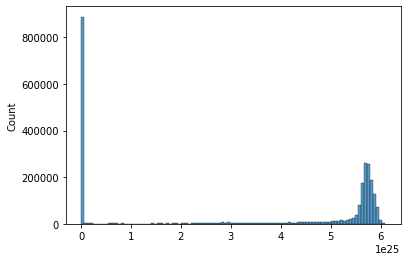

In [ ]:
df_np[:,9] = (df_np[:,9]**6)
sb.histplot(df_np[:,9], bins=100);

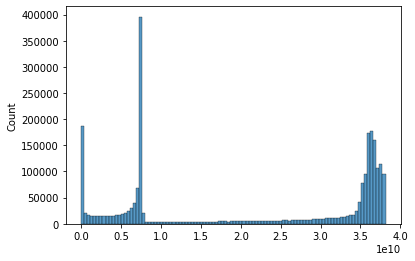

In [ ]:
df_np[:,12] = (df_np[:,12]**2)
sb.histplot(df_np[:,12], bins=100);

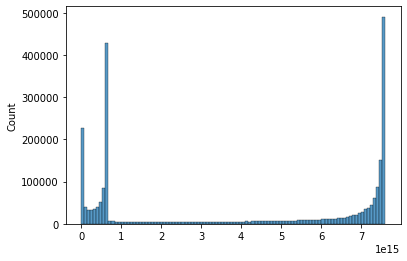

In [ ]:
#I could be more aggressive here, but I don't want to lose the three distinct peaks in the data.
df_np[:,27] = (df_np[:,27]**3)
sb.histplot(df_np[:,27], bins=100);

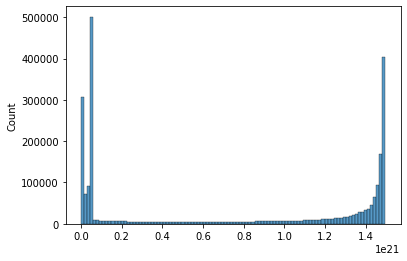

In [ ]:
df_np[:,58] = (df_np[:,58]**4)
sb.histplot(df_np[:,58], bins=100);

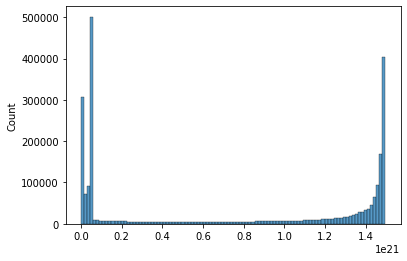

In [ ]:
df_np[:,77] = (df_np[:,77]**4)
sb.histplot(df_np[:,77], bins=100);

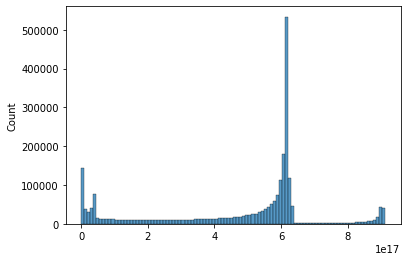

In [ ]:
df_np[:,108] = (df_np[:,108]**4)
sb.histplot(df_np[:,108], bins=100);

At this point, I have used power transformation on the left skewed data. I will now create a second ndarray to which I will apply Yeo-Johnson scaling. I will carry out the clustering on both models.

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_np)

In [ ]:
df_scaled[0:5, 0:5]

array([[0.00000000e+00, 8.48693260e-01, 0.00000000e+00, 0.00000000e+00,
        8.48693260e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [1.86618405e-03, 8.48693260e-01, 1.41329594e-15, 1.23984408e-03,
        8.48693260e-01],
       [3.73232041e-03, 8.48693260e-01, 1.88439459e-15, 2.47966914e-03,
        8.48693260e-01],
       [5.59770284e-03, 8.48693260e-01, 1.88439459e-15, 3.71919363e-03,
        8.48693260e-01]])

In [ ]:
ones = df_scaled.max(axis=0) - df_scaled.min(axis=0)
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
ones.shape

(115,)

In [ ]:
np.save('./drive/MyDrive/Data/df_scaled', df_scaled)

In [ ]:
df_scaled = np.load('./drive/MyDrive/Data/df_scaled.npy')

I will now create a second ndarray using Yeo-Johnson transform, which can be used on negative values and zero, and then I will min-max scale the data.

In [ ]:
df_yj = df.copy().to_numpy()

In [ ]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

In [ ]:
df_yj = transformer.fit_transform(df_yj)

In [ ]:
#quite aggressive transformations
transformer.lambdas_

array([ 1.30233650e+00,  5.46481383e+00,  1.55063026e+00,  1.49818548e+00,
        5.64732942e+00,  1.70691415e+00,  1.63264648e+00,  5.80084197e+00,
        1.87578666e+00,  1.52843255e+00,  5.84662177e+00,  1.98293302e+00,
        1.09069250e+00,  5.85446740e+00,  2.02279616e+00,  1.31084284e+00,
        5.47155437e+00,  1.56323270e+00,  1.52036193e+00,  5.65511524e+00,
        1.72804291e+00,  1.71268004e+00,  5.80755812e+00,  1.90615102e+00,
        1.64075077e+00,  5.85168005e+00,  2.01402896e+00,  1.11320524e+00,
        5.85622274e+00,  2.03637772e+00,  1.30145755e+00,  5.43563404e+00,
        2.38664996e+00,  3.04535756e+00,  1.45248771e+00,  9.91886275e-01,
        3.11614203e-01,  1.50281275e+00,  5.61549810e+00,  2.57267146e+00,
        3.39812658e+00,  1.97807933e+00,  9.91348717e-01,  3.91014647e-01,
        1.68224920e+00,  5.76519239e+00,  2.80674986e+00,  4.97392751e+00,
        3.35644592e+00,  9.90848869e-01,  1.47309193e-01,  1.60762940e+00,
        5.80891219e+00,  

In [ ]:
scaler = MinMaxScaler()
df_yj = scaler.fit_transform(df_yj)

In [ ]:
#Yeo-Johnson transform takes some time, so I am saving it out to skip the processing step.
np.save('./drive/MyDrive/Data/yeo_johnson', df_yj)

In [ ]:
df_yj = np.load('./drive/MyDrive/Data/yeo_johnson.npy')

I will now vizualize the top two principle components. I will do this for both datasets: the custom powers transform and the yeo-johnson powers transform.

In [ ]:
pc = PCA(n_components=2)
df_pca_1 = pc.fit_transform(df_scaled)
df_pca_2 = pc.fit_transform(df_yj)

In [ ]:
df_pca_1[0:5]

array([[ 3.81983461, -0.20568094],
       [ 3.5156016 , -0.65277424],
       [ 3.81713207, -0.20652229],
       [ 3.81397098, -0.2077851 ],
       [ 3.81091962, -0.20887408]])

In [ ]:
df_pca_2[0:5]

array([[3.67712538, 0.49995654],
       [2.83589671, 0.6410167 ],
       [3.74792491, 1.41344836],
       [3.74709526, 1.41131528],
       [3.74630288, 1.40968248]])

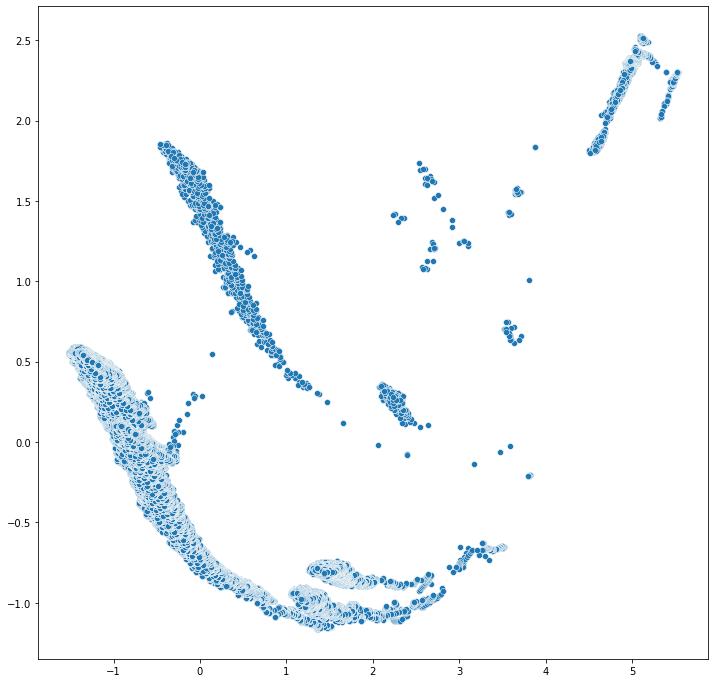

In [ ]:
plt.figure(figsize = (12,12))
sb.scatterplot(x=df_pca_1[:,0], y=df_pca_1[:,1], data=df_pca_1);

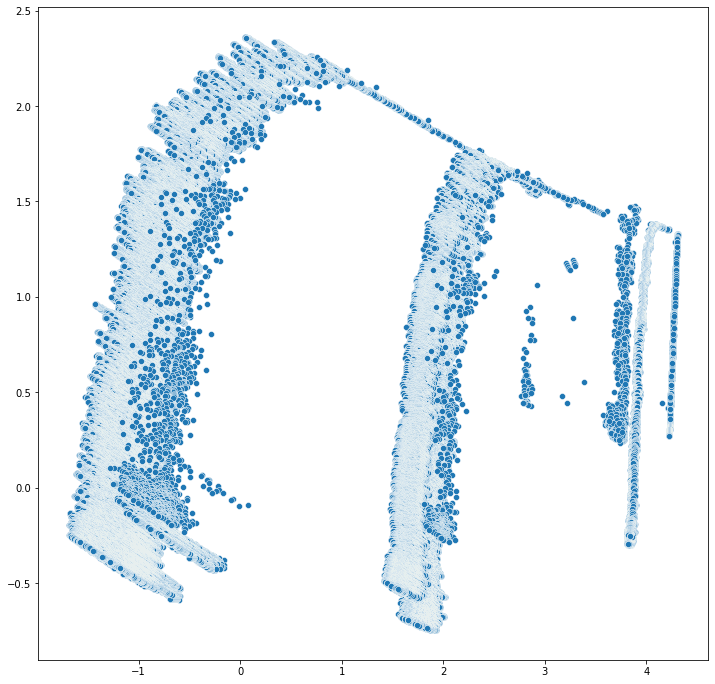

In [ ]:
plt.figure(figsize = (12,12))
sb.scatterplot(x=df_pca_2[:,0], y=df_pca_2[:,1], data=df_pca_2);

94% of the variance.

In [ ]:
pc = PCA(n_components=5)
df_pca_1 = pc.fit_transform(df_scaled)
pc.explained_variance_ratio_

array([0.69386393, 0.17986201, 0.05709469, 0.02160797, 0.01217961])

In [ ]:
np.save('./drive/MyDrive/Data/df_pca_1', df_pca_1)

In [ ]:
df_pca_1 = np.load('./drive/MyDrive/Data/df_pca_1.npy')

96.2% of the variance.

In [ ]:
pc = PCA(n_components=10)
df_pca_2 = pc.fit_transform(df_scaled)
pc.explained_variance_ratio_

array([0.69386393, 0.17986201, 0.05709469, 0.02160797, 0.01217961,
       0.00868396, 0.00537263, 0.00428156, 0.00383366, 0.00273624])

In [ ]:
np.save('./drive/MyDrive/Data/df_pca_2', df_pca_2)

In [ ]:
df_pca_2 = np.load('./drive/MyDrive/Data/df_pca_2.npy')

In addition to PCA, I will try discretization (Equal Frequency Binning) as suggested by https://www.sciencedirect.com/science/article/pii/S0022000014000208

We do not have side information in the form of {Destination IP, Destination Port, Protocol}, but the major ideas should transfer.

In [ ]:
binner = KBinsDiscretizer(n_bins = 100, encode='ordinal', strategy='quantile')
df_binned = binner.fit_transform(df)
binner.bin_edges_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 81 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 85 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 86 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 88 are removed. Consider decreasing the number of bins.
  'decreasing the number of b

array([array([  1.        ,  25.37550509,  27.48358668,  30.03944973,
        34.92335723, 127.19669917, 141.78182276, 145.42256967,
       148.04429956, 150.28752466, 152.42546167, 154.52329917,
       156.50360157, 158.35955546, 160.19271288, 162.00420531,
       163.81296693, 165.59969161, 167.46621713, 169.62819377,
       172.02588266, 174.70864753, 177.87868419, 181.2919505 ,
       185.15851519, 189.35831785, 194.24543074, 199.39864073,
       204.43758191, 210.40713779, 216.48745841, 221.98867878,
       228.23765101, 235.57841388, 250.13989183, 316.18782019,
       324.89095925, 330.21854768, 334.29004612, 337.67090829,
       340.62568449, 343.29008046, 345.68358513, 347.89712926,
       349.93427062, 351.84871736, 353.68864025, 355.45179212,
       357.16341071, 358.82917181, 360.44832519, 362.03137829,
       363.59304701, 365.13671889, 366.68856046, 368.23786226,
       369.80138876, 371.36785328, 372.94092787, 374.49206024,
       376.05582944, 377.62883903, 379.19475456,

In [ ]:
df_binned[0:5]

array([[ 0., 19.,  0.,  0., 18.,  0.,  0., 14.,  0.,  0.,  5.,  0.,  0.,
         4.,  0.,  0., 19.,  0.,  0., 18.,  0.,  0., 14.,  0.,  0.,  5.,
         0.,  0.,  4.,  0.,  0., 19.,  0., 15.,  0., 37., 37.,  0., 18.,
         0., 14.,  0., 39., 39.,  0., 14.,  0.,  7.,  0., 47., 47.,  0.,
         5.,  0.,  0.,  0., 55., 55.,  0.,  4.,  0.,  0.,  0., 57., 57.,
         0., 99.,  0.,  0., 99.,  0.,  0., 99.,  0.,  0., 99.,  0.,  0.,
        99.,  0.,  0., 16.,  0., 20.,  0.,  0.,  1.,  0., 12.,  0., 16.,
         0.,  0.,  1.,  0., 11.,  0., 15.,  0.,  0.,  1.,  0., 11.,  0.,
        15.,  0.,  1.,  1.,  0., 11.,  0., 15.,  0.,  1.,  2.],
       [ 0., 99.,  0.,  0., 99.,  0.,  0., 99.,  0.,  0., 99.,  0.,  0.,
        99.,  0.,  0., 99.,  0.,  0., 99.,  0.,  0., 99.,  0.,  0., 99.,
         0.,  0., 99.,  0.,  0., 99.,  0., 99.,  0., 37., 37.,  0., 99.,
         0., 99.,  0., 39., 39.,  0., 99.,  0., 99.,  0., 47., 47.,  0.,
        99.,  0., 99.,  0., 55., 55.,  0., 99.,  0., 99.,  0

In [ ]:
np.save('./drive/MyDrive/Data/df_binned', df_binned)

In [ ]:
df_binned = np.load('./drive/MyDrive/Data/df_binned.npy')

# Clustering
We will now move from EDA and scaling to the clustering problem. We will start with OPTICS, which is connected to DBSCAN, but it more optimized for large data sets. Based on the vizualization of the first two principle components, I have the feeling that a DBSCAN based model will fit the data rather well. We will then move to Gaussian Mixture Modelling, which was suggested by the preceding paper.


In [ ]:
def gmm_fit(df, rand, range):

    lowest_bic = np.infty
    bic = []
    n_components_range = range
    # ['spherical', 'tied', 'diag', 'full']
    cv_types = ['full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, random_state=rand)
            gmm.fit(df)
            bic.append(gmm.bic(df))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
                best_cv = cv_type

    return (best_gmm, best_cv)

In [ ]:
(gmm, cv) = gmm_fit(df_pca_2, 42, [25])

In [ ]:
gmm_labels = gmm.predict(df_pca_2)
print(cv)
np.bincount(gmm_labels)

full


array([154992, 197973, 114410,  39471, 139544,  75347, 113650, 183315,
        39303, 277857,  21799,  45640,  52667,   2603,  15506,  10484,
        41424, 308656,  77255,  99082, 102908, 186784,  78267,  80533,
        44797])

In [ ]:
np.save('./drive/MyDrive/Data/gmm25_labels', gmm_labels)

In [ ]:
gmm.bic(df_pca_2)

-112763484.91147879

##GMM BIC SCORES
### df_pca_1
Number of Components: 100 <br>
Type: Full <br>
BIC: -34717370.66488184 <br>
Number of Comonents: 50 <br>
Type: Full <br>
BIC: -33698906.66723816 <br>
Number of Components: 10 <br>
Type: Full <br>
BIC: -28080259.15330478 <br>

### df_pca_2
Number of Components: 150 <br>
Type: Full <br>
BIC: -125937343.75937042 <br>
Number of Components: 100 <br>
Type: Full <br>
BIC: -123059820.82496431 <br>
Number of Components: 75 <br>
Type: Full <br>
BIC: -121550433.96062621 <br>
Number of Components: 50 <br>
Type: Full <br>
BIC: -119014896.271642 <br>
Number of Components: 25 <br>
Type: Full <br>
BIC: -112763484.91147879 <br>
Number of Components: 10 <br>
Type: Full <br>
BIC: -99547704.31571433 <br>

## Best Fit
df_pca_2 <br>
Components: 150 <br>
Type: Full <br>
BIC: -125937343.75937042 <br>
Yeo-Johnson Transformed data with 10 Principle Components capturing 96.2% of the variance.

In [ ]:
scores = np.array([-99547704.31571433, -112763484.91147879, -119014896.271642, -121550433.96062621, -123059820.82496431, -125937343.75937042])

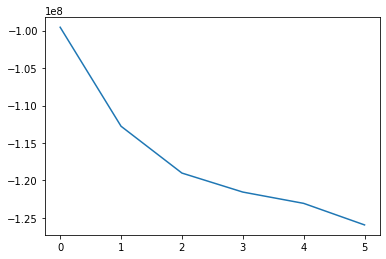

In [ ]:
sb.lineplot(data=scores);

In [ ]:
scores = np.load('/content/drive/MyDrive/Data/gmm150_labels.npy')

# Classification

While there is no time stamp on this data, it was collected sequentially, with the first one million rows of the data collected are from normal operations and the rest of the data collected from a Man in the Middle attack. To respect this distribution I will select the first 70% of the data from each category as training data, and then split the last 30% into a test and validation set. Normally I would use a 5 fold cross validation strategy, but randomly sorting the data in this case would lower the accuracy of the final model.

In [ ]:
scores = pd.DataFrame(scores)
scores_dum = pd.get_dummies(scores.astype("str"))
X_1 = df_pca_2[0:1000000, :]
X_2 = df_pca_2[1000000:,:]
y_1 = scores_dum[0:1000000]
y_2 = scores_dum[1000000:]
print(X_1.shape)
print(X_2.shape)
print(y_1.shape)
print(y_2.shape)
print(df_pca_2.shape)
print(scores.shape)

(1000000, 10)
(1504267, 10)
(1000000, 150)
(1504267, 150)
(2504267, 10)
(2504267, 1)


In [ ]:
X_2.shape[0]*.7

1052986.9

In [ ]:
X_1_train = X_1[0:700000]
X_1_lag = X_1[700000:]
print(X_1_lag.shape)
y_1_train = y_1[0:700000]
print(y_1_train.shape)
y_1_lag = y_1[700000:]
print(y_1_lag.shape)
X_2_train = X_2[0:1052987]
X_2_lag = X_2[1052987:]
y_2_train = y_2[0:1052987]
y_2_lag = y_2[1052987:]
X_1_test = X_1_lag[0:200000]
X_1_val = X_1_lag[200000:]
y_1_test = y_1_lag[0:200000]
y_1_val = y_1_lag[200000:]
X_2.shape[0]*.2

(300000, 10)
(700000, 150)
(300000, 150)


300853.4

In [ ]:
X_2_test = X_2_lag[0:300853]
X_2_val = X_2_lag[300853:]
y_2_test = y_2_lag[0:300853]
y_2_val = y_2_lag[300853:]

In [ ]:
X_train = np.append(X_1_train, X_2_train, axis=0)
print(X_train.shape)
y_train = np.append(y_1_train, y_2_train, axis=0)
print(y_train.shape)
X_test = np.append(X_1_test, X_2_test, axis=0)
print(X_test.shape)
y_test = np.append(y_1_test, y_2_test, axis=0)
print(y_test.shape)
X_val = np.append(X_1_val, X_2_val, axis=0)
print(X_val.shape)
y_val = np.append(y_1_val, y_2_val, axis=0)
print(y_val.shape)
#X_train = pd.DataFrame(X_train)
#y_train = pd.DataFrame(y_train)
#X_test = pd.DataFrame(X_test)
#y_test = pd.DataFrame(y_test)
#y_test = oh.fit_transform(y_test)
#y_train = oh.fit_transform(y_train)
print(y_test.shape)
print(y_train.shape)

(1752987, 10)
(1752987, 150)
(500853, 10)
(500853, 150)
(250427, 10)
(250427, 150)
(500853, 150)
(1752987, 150)


In [ ]:
def run_training(X_train, y_train, X_test, y_test, batch, epoch):

    nn = Sequential([
        layers.Dense(1024, input_dim=10),
        layers.BatchNormalization(),
        layers.PReLU(),
        layers.Dropout(0.6),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.PReLU(),
        layers.Dropout(0.4),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.PReLU(),
        layers.Dropout(0.2),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.PReLU(),
        layers.Dropout(0.2),
        layers.Dense(56),
        layers.BatchNormalization(),
        layers.PReLU(),
        layers.Dropout(0.2),
        layers.Dense(150, activation="softmax"),
    ])

    nn.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
 
    # my_callbacks = [
    #    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    # ]

    nn.fit(
        X_train,
        y_train,
        batch_size=batch,
        epochs=epoch,
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
        validation_data=(X_test, y_test),
        use_multiprocessing=True,
        verbose=2
        # callbacks=my_callbacks
    )
    # print(results.history)
    nn.save('/content/drive/MyDrive/Data/tmp/model')
    #results = nn.evaluate(X_test, y_test, batch_size=250)
    #print(results ** 0.5)

    preds = nn.predict(X_test)
    print(nn.evaluate(X_test, y_test, verbose=3))

    return (nn, preds)


In [ ]:
tf.keras.backend.set_floatx('float64')
predictions = run_training(X_train, y_train, X_test, y_test, 512, 300)

Epoch 1/300
3424/3424 - 54s - loss: 2.5177 - auc_2: 0.9621 - precision_2: 0.6348 - recall_2: 0.0622 - val_loss: 4.7650 - val_auc_2: 0.8007 - val_precision_2: 0.2497 - val_recall_2: 0.0787
Epoch 2/300
3424/3424 - 50s - loss: 1.2362 - auc_2: 0.9932 - precision_2: 0.7178 - recall_2: 0.3563 - val_loss: 5.2493 - val_auc_2: 0.7949 - val_precision_2: 0.3734 - val_recall_2: 0.2511
Epoch 3/300
3424/3424 - 51s - loss: 0.9531 - auc_2: 0.9946 - precision_2: 0.7479 - recall_2: 0.5415 - val_loss: 5.7502 - val_auc_2: 0.7967 - val_precision_2: 0.3909 - val_recall_2: 0.3202
Epoch 4/300
3424/3424 - 51s - loss: 0.8334 - auc_2: 0.9952 - precision_2: 0.7682 - recall_2: 0.6145 - val_loss: 6.0726 - val_auc_2: 0.7957 - val_precision_2: 0.3993 - val_recall_2: 0.3412
Epoch 5/300
3424/3424 - 50s - loss: 0.7573 - auc_2: 0.9957 - precision_2: 0.7835 - recall_2: 0.6564 - val_loss: 6.3810 - val_auc_2: 0.7951 - val_precision_2: 0.4088 - val_recall_2: 0.3562
Epoch 6/300
3424/3424 - 50s - loss: 0.7012 - auc_2: 0.9961 -